**Task:  Implementation of Teleportation protocol**
- Implement quantum gates  using teleportation
- Use the barrier function creates a visual separation
- Test that the protocol works correctly for different state vectors.
- Proof that Q was successfully teleported into B


--- Teleportation Test: |0⟩ ---
Fidelity with original state: 1.0
✅ Teleportation successful!


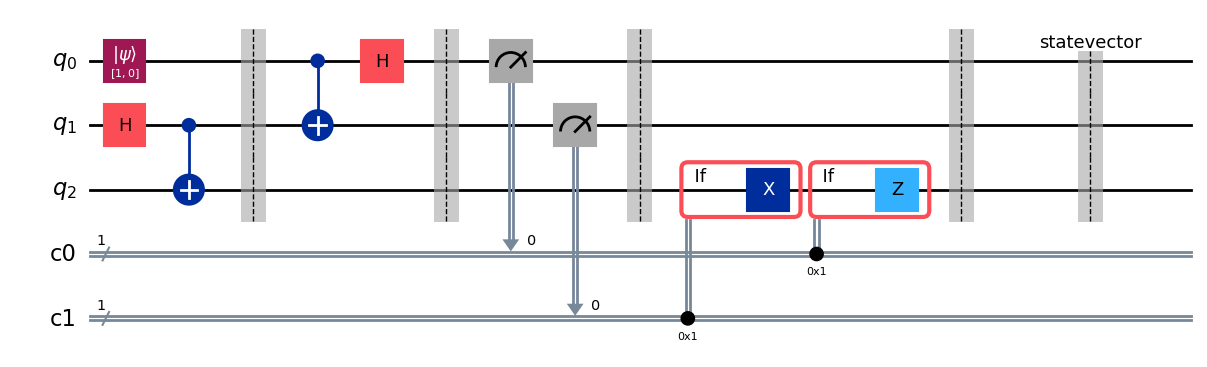


--- Teleportation Test: |1⟩ ---
Fidelity with original state: 1.0
✅ Teleportation successful!


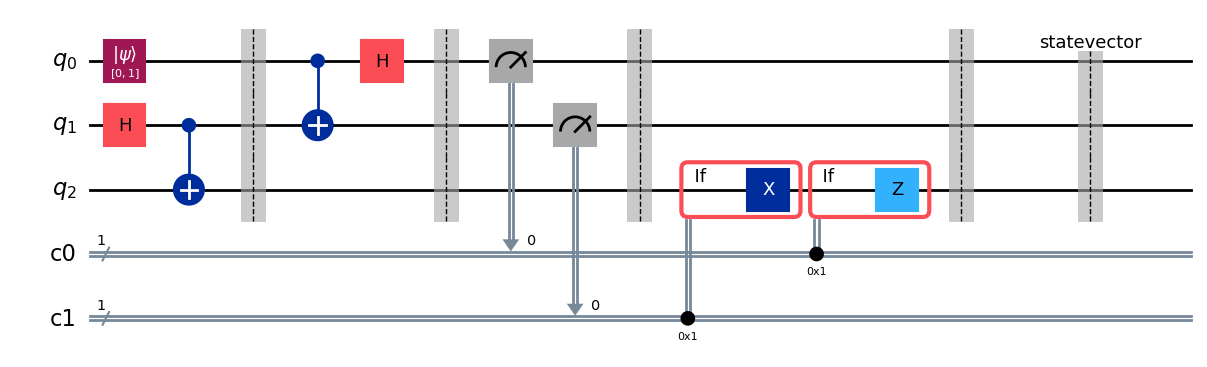


--- Teleportation Test: |+⟩ ---
Fidelity with original state: 1.0
✅ Teleportation successful!


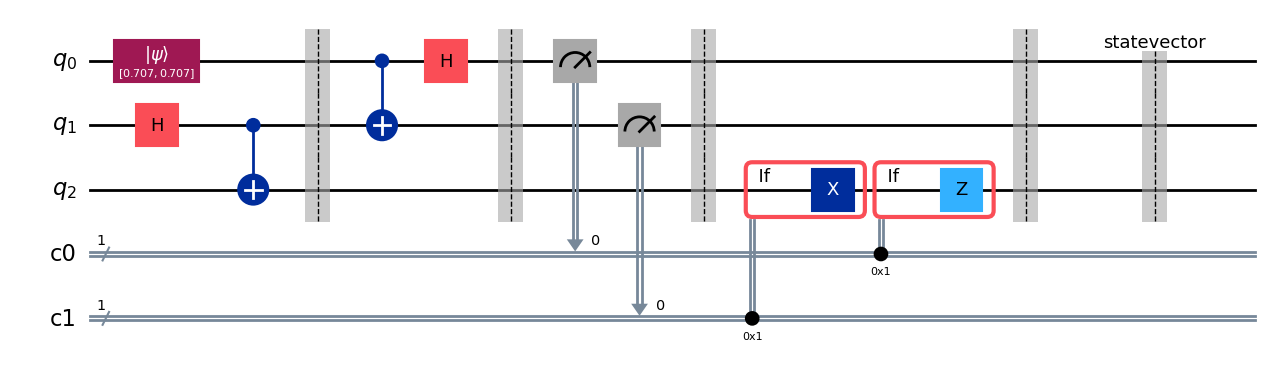


--- Teleportation Test: |−⟩ ---
Fidelity with original state: 1.0
✅ Teleportation successful!


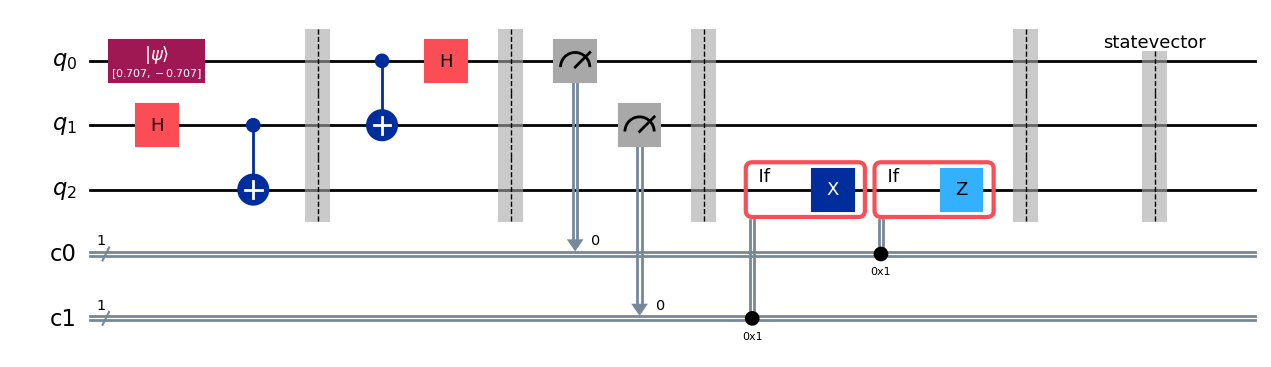


--- Teleportation Test: Random ψ ---
Fidelity with original state: 1.0
✅ Teleportation successful!


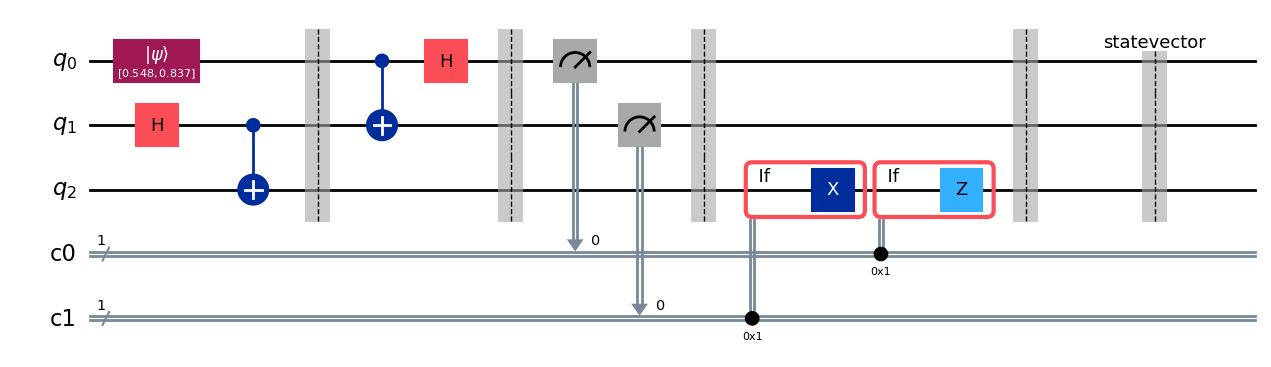

In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, state_fidelity, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

def teleportation_circuit(psi_state):
    # Define quantum and classical registers
    q = QuantumRegister(3, 'q')
    c0 = ClassicalRegister(1, 'c0')
    c1 = ClassicalRegister(1, 'c1')
    qc = QuantumCircuit(q, c0, c1)

    # Step 1: Prepare the input state on qubit 0
    qc.initialize(psi_state, q[0])

    # Step 2: Create entangled pair between qubits 1 and 2
    qc.h(q[1])
    qc.cx(q[1], q[2])
    qc.barrier()

    # Step 3: Bell measurement on qubits 0 and 1
    qc.cx(q[0], q[1])
    qc.h(q[0])
    qc.barrier()
    qc.measure(q[0], c0)
    qc.measure(q[1], c1)
    qc.barrier()

    # Step 4: Conditional corrections using new control flow syntax
    with qc.if_test((c1, 1)):
        qc.x(q[2])
    with qc.if_test((c0, 1)):
        qc.z(q[2])
    qc.barrier()

    qc.save_statevector()
    return qc


def verify_teleportation(qc, original_state):
    simulator = AerSimulator(method='statevector')
    result = simulator.run(qc).result()
    final_state = result.data(0)['statevector']

    reduced_B = partial_trace(Statevector(final_state), [0, 1])
    fidelity = state_fidelity(reduced_B, Statevector(original_state))
    return fidelity, reduced_B


# Test various states
test_states = {
    "|0⟩": [1, 0],
    "|1⟩": [0, 1],
    "|+⟩": [1/np.sqrt(2), 1/np.sqrt(2)],
    "|−⟩": [1/np.sqrt(2), -1/np.sqrt(2)],
    "Random ψ": [np.sqrt(0.3), np.sqrt(0.7)]
}

for label, state in test_states.items():
    qc = teleportation_circuit(state)
    fidelity, reduced = verify_teleportation(qc, np.array(state))

    print(f"\n--- Teleportation Test: {label} ---")
    print("Fidelity with original state:", round(fidelity, 4))
    print("✅ Teleportation successful!" if fidelity > 0.99 else "⚠️ Teleportation mismatch detected.")
    display(qc.draw('mpl'))
    plot_bloch_multivector(reduced.data)
    plt.show()


**Inference**
- The quantum teleportation protocol was implemented using Hadamard, CNOT, X, and Z gates.
- Barriers were employed to distinctly separate each stage of the teleportation process.
- The circuit was tested on multiple quantum states — |0⟩, |1⟩, |+⟩, |−⟩, and a random ψ.
- Simulation results show fidelities approximately equal to 1.0 for all cases.
- This demonstrates that the initial state from qubit Q was perfectly reproduced at qubit B.
- Hence, the teleportation protocol was verified to be both accurate and state-independent.